In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [12]:
df = pd.read_csv("train.csv")

In [13]:
df

,date,store,item,sales
0,2013-01-01,1,1,13
1,2013-01-02,1,1,11
2,2013-01-03,1,1,14
3,2013-01-04,1,1,13
4,2013-01-05,1,1,10
...,...,...,...,...
912995,2017-12-27,10,50,63
912996,2017-12-28,10,50,59
912997,2017-12-29,10,50,74
912998,2017-12-30,10,50,62


In [14]:
df['item'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50],
      dtype=int64)

In [15]:
df['store'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [43]:
df_1 = df[df['item']==1]

In [44]:
df_1

,date,store,item,sales,year,month
0,2013-01-01,1,1,13,2013,1
1,2013-01-02,1,1,11,2013,1
2,2013-01-03,1,1,14,2013,1
3,2013-01-04,1,1,13,2013,1
4,2013-01-05,1,1,10,2013,1
...,...,...,...,...,...,...
18255,2017-12-27,10,1,19,2017,12
18256,2017-12-28,10,1,12,2017,12
18257,2017-12-29,10,1,23,2017,12
18258,2017-12-30,10,1,26,2017,12


In [45]:
df["date"] = pd.to_datetime(df["date"],format = '%Y-%m-%d')
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df.head()

,date,store,item,sales,year,month
0,2013-01-01,1,1,13,2013,1
1,2013-01-02,1,1,11,2013,1
2,2013-01-03,1,1,14,2013,1
3,2013-01-04,1,1,13,2013,1
4,2013-01-05,1,1,10,2013,1


In [46]:
figure = px.line(df_1, 
                     x = "date",
                     y  = "sales",
                     title = "Sales by Year")
figure.show()

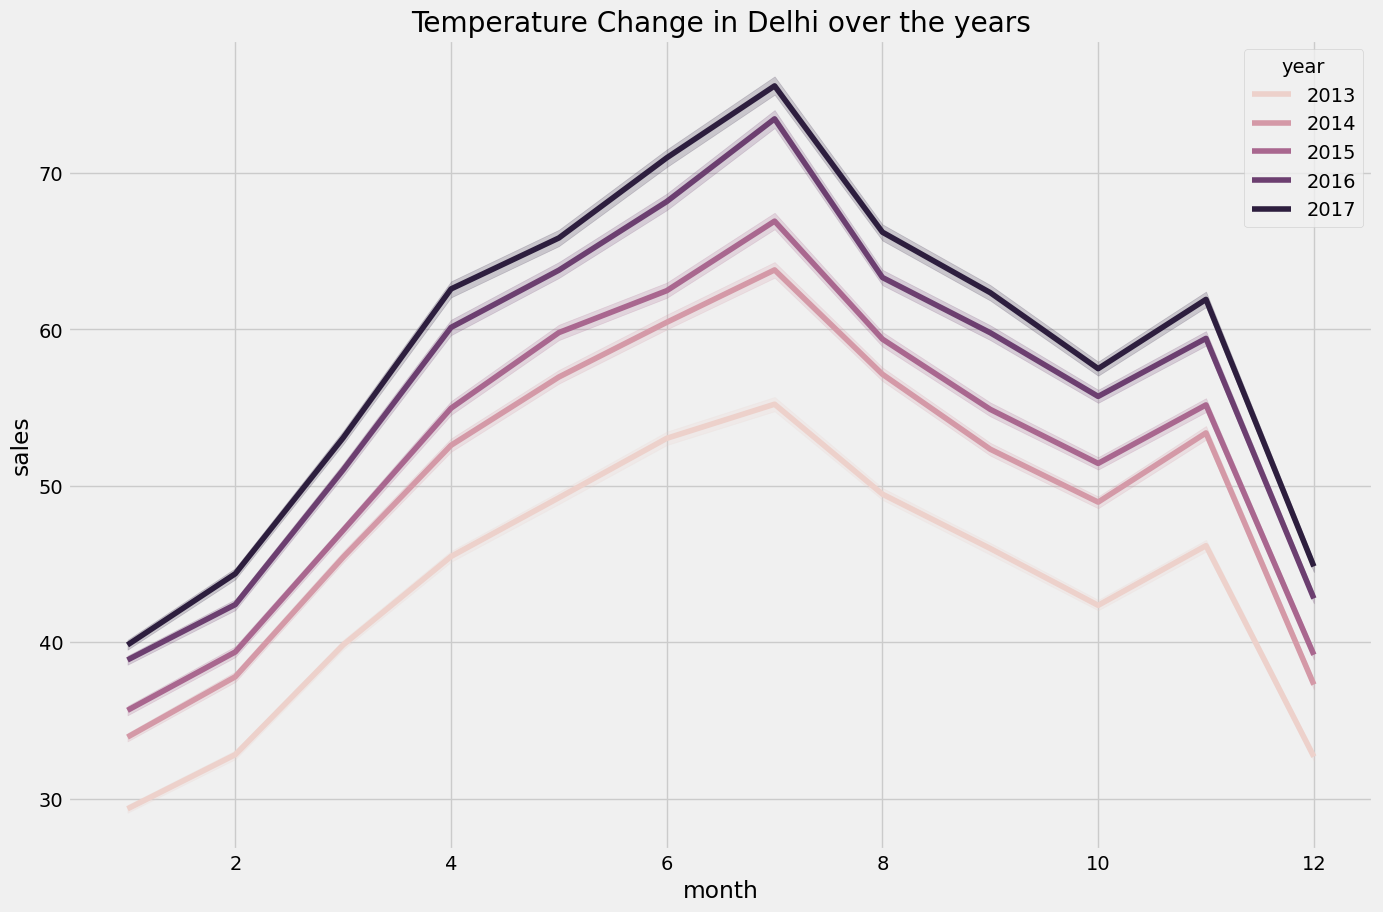

In [47]:
plt.style.use('fivethirtyeight')
plt.figure(figsize=(15,10))
plt.title("Temperature Change in Delhi over the years")
sns.lineplot(data=df, x="month", y='sales', hue='year')
plt.show()

In [50]:
df_1["date"] = pd.to_datetime(df_1["date"],format = '%Y-%m-%d')
df_1['year'] = df_1['date'].dt.year
df_1['month'] = df_1['date'].dt.month
df_1.head()


forecast_data = df_1.rename(columns = {"date": "ds", "sales": "y"})
forecast_data

C:\Users\haluk\AppData\Local\Temp\ipykernel_17900\956519926.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haluk\AppData\Local\Temp\ipykernel_17900\956519926.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\haluk\AppData\Local\Temp\ipykernel_17900\956519926.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,ds,store,item,y,year,month
0,2013-01-01,1,1,13,2013,1
1,2013-01-02,1,1,11,2013,1
2,2013-01-03,1,1,14,2013,1
3,2013-01-04,1,1,13,2013,1
4,2013-01-05,1,1,10,2013,1
...,...,...,...,...,...,...
18255,2017-12-27,10,1,19,2017,12
18256,2017-12-28,10,1,12,2017,12
18257,2017-12-29,10,1,23,2017,12
18258,2017-12-30,10,1,26,2017,12


In [54]:
#pip install prophet

C:\Users\haluk\AppData\Local\Temp\ipykernel_17900\2253240397.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

13:00:21 - cmdstanpy - INFO - Chain [1] start processing
13:00:23 - cmdstanpy - INFO - Chain [1] done processing


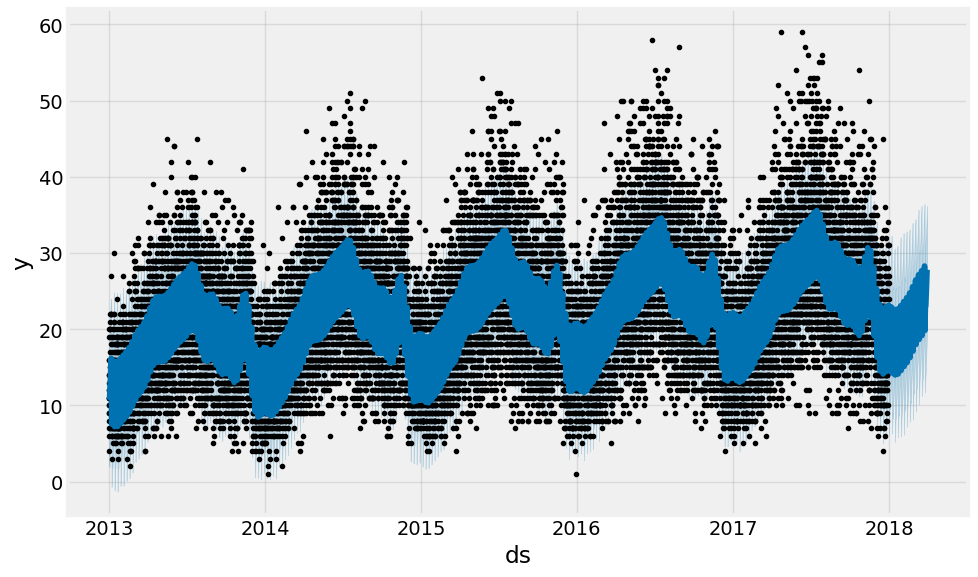

In [53]:
#estimation of sales of item 1

df_1['ds'] = pd.to_datetime(df_1['date'])

# Rename columns as required by Prophet
df_1 = df_1.rename(columns={'ds': 'ds', 'sales': 'y'})

# Instantiate the Prophet model
model = Prophet()

# Fit the model
model.fit(df_1)

# Create a DataFrame with future dates for the next 3 months
future = model.make_future_dataframe(periods=90)

# Make predictions
forecast = model.predict(future)

# Plot the forecast
fig = model.plot(forecast)

# Show the plot
plt.show()

# similarly it is possible to estimate the sales of other items.

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
